<a href="https://colab.research.google.com/github/codebybea/AV-2B-1-IESB/blob/main/Atividade_05_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CÓDIGO BASE

In [1]:
pip install scikit-learn

In [ ]:
from sklearn.module import Model
# Uma instância do modelo é criada.
model = Model()
# O modelo é treinado usando os dados X (features) e y (rótulos).
model.fit(X, y)
# O modelo faz previsões com base em novos dados (X_new).
predictions = model.predict(X_new)
# As previsões são impressas no formato de um array NumPy.
print(predictions)

In [3]:
pip install pandas

In [4]:
import pandas as pd

churn_df = pd.read_csv('./telecom_churn_clean.csv')

churn_df.head(20)

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,5,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,6,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,7,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,8,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,9,141,415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


In [5]:
from sklearn.neighbors import KNeighborsClassifier

X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values
print(X.shape, y.shape)

(3333, 2) (3333,)


In [6]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

In [7]:
import numpy as np

X_new = np.array([[56.8, 17.5],
                  [24.4, 24.1],
                  [50.1, 10.9]])
print(X_new.shape)

(3, 2)


In [8]:
predictions = knn.predict(X_new)
print('Predictions: {}'.format(predictions))

Predictions: [1 0 0]


In [9]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [10]:
X_new = np.array([[30.0, 17.5],
[107.0, 24.1],
[213.0, 10.9]])

In [11]:
# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred))

Predictions: [0 1 0]


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=21, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.854


In [18]:
train_accuracies = {}
test_accuracies = {}

neighbors = np.arange(1, 26)

for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors=neighbor)
  knn.fit(X_train, y_train)

  train_accuracies[neighbor] = knn.score(X_train, y_train)
  test_accuracies[neighbor] = knn.score(X_test, y_test)

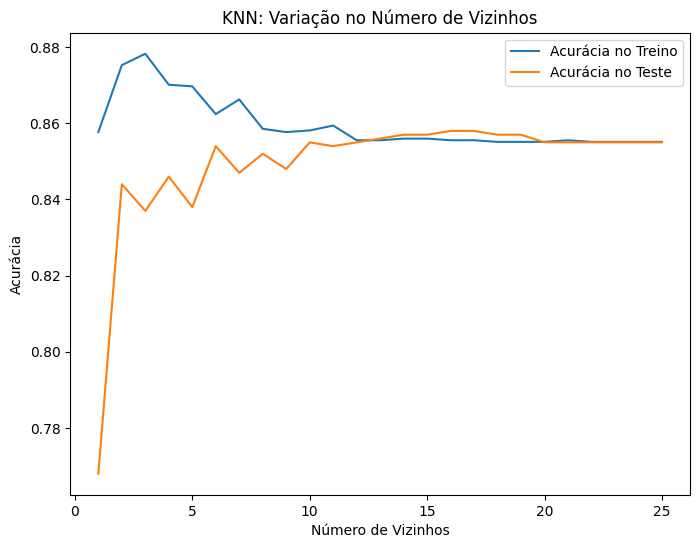

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.title("KNN: Variação no Número de Vizinhos")

plt.plot(neighbors, train_accuracies.values(), label="Acurácia no Treino")
plt.plot(neighbors, test_accuracies.values(), label="Acurácia no Teste")

plt.legend()
plt.xlabel("Número de Vizinhos")
plt.ylabel("Acurácia")
plt.show()